Observations:
1. Capomulin and Ramicane were the only drugs effective at shrinking tumor volume.
2. While Capomulin and Ramicane did slow the spread of the cancer, none of the drugs were completely effective at stopping spread of the cancer (Metastatic Sites).
3. Capomulin and Ramicane had the highest effectiveness at keeping mice alive however all populations suffered declining survival rates throughout the entire testing period.
4. Only Capomulin and Ramicane were effective at shrinking tumors.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from random import random
from scipy.stats import sem


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read in the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

'''# Combine the data from both files into a single dataset
'''
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

merged_data = pd.merge(mouse_data, clinical_data,how="left",on = ["Mouse ID"])

# Display the data table for preview
merged_data.head(15)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [2]:
'''Mean Tumor Volume Data Grouped by Drug and Timepoint
'''
merged_data_grpd = merged_data.groupby(["Drug", "Timepoint"]).mean()
# merged_data_grpd.head(15)

'''# Convert to DataFrame & Store in new DataFrame 
'''
MeanTumorVolume_df=merged_data_grpd
# Preview DataFrame
print(type(MeanTumorVolume_df))
MeanTumorVolume_df.head(15)

<class 'pandas.core.frame.DataFrame'>


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111

In [3]:
# merged_data_grpd = merged_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().to_frame()
merged_data_grpd2 = merged_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]

'''Mean Tumor Volume Data Grouped by Drug and Timepoint w/o Metastatic Sites data
'''
print(type(merged_data_grpd2))
merged_data_grpd2.mean().to_frame()

# DrgTimeVol_df = merged_data_grpd2(["Drug", "Timepoint", "Tumor Volume (mm3)"])
# DrgTimeVol_df.head()

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [4]:
tumor_mean = merged_data_grpd["Tumor Volume (mm3)"].mean()
print(type(tumor_mean))
tumor_mean

<class 'float'>


52.34521575521987

In [33]:
tumor_mean_df = tumor_mean

print(type(tumor_mean_df))
tumor_mean_df

<class 'float'>


52.34521575521987

In [7]:
tumor_vols_mean = merged_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

In [8]:
# tumor_vols_mean is a series
print(type(tumor_vols_mean))
tumor_vols_mean.head(15).to_frame()


<class 'pandas.core.series.Series'>


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049

In [9]:
# convert to tumor_vols_mean_df - a DATAFRAME
tumor_vols_mean_df = pd.DataFrame(tumor_vols_mean)
print(type(tumor_vols_mean_df))
tumor_vols_mean_df


<class 'pandas.core.frame.DataFrame'>


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [10]:
# Reset the index for tumor_vols_mean_df
tumor_vols_mean_df = tumor_vols_mean_df.reset_index()

In [11]:
print(type(tumor_vols_mean_df))
tumor_vols_mean_df.head()


<class 'pandas.core.frame.DataFrame'>


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [12]:
'''Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
'''

tumor_vols_sem = merged_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
print(type(tumor_vols_sem))

tumor_vols_sem = pd.DataFrame(tumor_vols_sem)
tumor_vols_sem = tumor_vols_sem.rename(columns={"Tumor Volume (mm3)":"Tumor Standard Error"})

print(type(tumor_vols_sem))

tumor_vols_sem

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Tumor Standard Error
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.448593
          10                     0.702684
          15                     0.838617
          20                     0.909731
...                                   ...
Zoniferol 25                     0.602513
          30                     0.800043
          35                     0.881426
          40                     0.998515
          45                     1.003576

[100 rows x 1 columns]

In [13]:
'''Convert to DataFrame for Standard Error of Tumor Volumes Grouped by Drug and Timepoint
'''

tumor_vols_sem_df = pd.DataFrame(tumor_vols_sem)

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_sem_df = tumor_vols_sem_df.reset_index()

In [14]:
# Preview DataFrame

print(type(tumor_vols_sem_df))

tumor_vols_sem_df.head(12)


<class 'pandas.core.frame.DataFrame'>


,Drug,Timepoint,Tumor Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [15]:
tumor_vols_sem_df.dtypes

Drug                     object
Timepoint                 int64
Tumor Standard Error    float64
dtype: object

In [16]:
'''  Minor Data Munging to Re-Format the Tumor Volumes Standard Error Data Frame  '''

tumor_vols_sem_pivot = tumor_vols_sem_df.pivot(index = "Timepoint", columns = "Drug")["Tumor Standard Error"]
tumor_vols_sem_pivot_df = pd.DataFrame(tumor_vols_sem_pivot)

# Preview that Reformatting worked
print(type(tumor_vols_sem_pivot_df))
tumor_vols_sem_pivot_df

<class 'pandas.core.frame.DataFrame'>


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


## Tumor Response to Treatment

In [17]:
# Minor Data Munging to Re-Format the Tumor Volumes MEAN Data Frame
tumor_vols_mean_pivot = tumor_vols_mean_df.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
tumor_vols_mean_pivot_df = pd.DataFrame(tumor_vols_mean_pivot)

# Preview that Reformatting worked
tumor_vols_mean_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


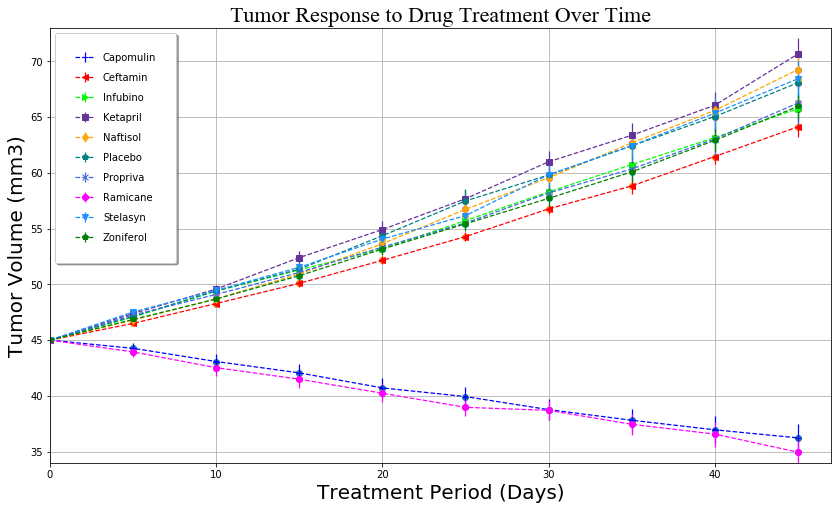

In [35]:
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# Setting up the plot

# x_Axis values
a = [0,5,10,15,20,25,30,35,40,45]

# y_Axis values
b = tumor_vols_mean_pivot_df["Capomulin"]
d = tumor_vols_mean_pivot_df["Ceftamin"]
e = tumor_vols_mean_pivot_df["Infubinol"]
f = tumor_vols_mean_pivot_df["Ketapril"]
g = tumor_vols_mean_pivot_df["Naftisol"]
h = tumor_vols_mean_pivot_df["Placebo"]
j = tumor_vols_mean_pivot_df["Propriva"]
k = tumor_vols_mean_pivot_df["Ramicane"]
l = tumor_vols_mean_pivot_df["Stelasyn"]
m = tumor_vols_mean_pivot_df["Zoniferol"]

# Scatter Plot
plt.scatter(a,b)
plt.scatter(a,d)
plt.scatter(a,e)
plt.scatter(a,f)
plt.scatter(a,g)
plt.scatter(a,h)
plt.scatter(a,j)
plt.scatter(a,k)
plt.scatter(a,l)
plt.scatter(a,m)

# Standard Error Data
CapomulinErr = tumor_vols_sem_pivot_df["Capomulin"]
CeftaminErr = tumor_vols_sem_pivot_df["Ceftamin"]
InfubinolErr = tumor_vols_sem_pivot_df["Infubinol"]
KetaprilErr = tumor_vols_sem_pivot_df["Ketapril"]
NaftisolErr = tumor_vols_sem_pivot_df["Naftisol"]
PlaceboErr = tumor_vols_sem_pivot_df["Placebo"]
ProprivaErr = tumor_vols_sem_pivot_df["Propriva"]
RamicaneErr = tumor_vols_sem_pivot_df["Ramicane"]
StelasynErr = tumor_vols_sem_pivot_df["Stelasyn"]
ZoniferolErr = tumor_vols_sem_pivot_df["Zoniferol"]


CapomulinPlot = plt.errorbar(a,b,yerr=CapomulinErr, linestyle="dashed", 
                              marker="+",color="blue", linewidth=1.25, label="Capomulin")

CeftaminPlot = plt.errorbar(a,d,yerr=CeftaminErr, linestyle="dashed", 
                              marker="<",color="red", linewidth=1.25, label="Ceftamin")

InfubinoPlot = plt.errorbar(a,e,yerr=InfubinolErr, linestyle="dashed", 
                              marker=">",color="lime", linewidth=1.25, label="Infubino")

KetaprilPlot = plt.errorbar(a,f,yerr=KetaprilErr, linestyle="dashed", 
                              marker="s",color="rebeccapurple", linewidth=1.25, label="Ketapril")

NaftisolPlot = plt.errorbar(a,g,yerr=NaftisolErr, linestyle="dashed", 
                              marker="d",color="orange", linewidth=1.25, label="Naftisol")

PlaceboPlot = plt.errorbar(a,h,yerr=PlaceboErr, linestyle="dashed", 
                              marker="p",color="teal", linewidth=1.25, label="Placebo")

ProprivaPlot = plt.errorbar(a,j,yerr=ProprivaErr, linestyle="dashed", 
                              marker="x",color="royalblue", linewidth=1.25, label="Propriva")

RamicanePlot = plt.errorbar(a,k,yerr=RamicaneErr, linestyle="dashed", 
                              marker="8",color="magenta", linewidth=1.25, label="Ramicane")

StelasynPlot = plt.errorbar(a,l,yerr=StelasynErr, linestyle="dashed", 
                              marker="v",color="dodgerblue", linewidth=1.25, label="Stelasyn")

ZoniferolPlot = plt.errorbar(a,m,yerr=ZoniferolErr, linestyle="dashed", 
                              marker="p",color="green", linewidth=1.25, label="Zoniferol")


matplotlib.rc('figure', figsize=(14, 8))
plt.grid()
plt.ylim(34, 73)
plt.xlim(0, 47)
plt.title("Tumor Response to Drug Treatment Over Time",fontname="Times New Roman", fontsize=22, fontweight="bold")
plt.xlabel("Treatment Period (Days)", fontsize=20)
plt.ylabel("Tumor Volume (mm3)", fontsize=20)
plt.legend(loc="upper left",labelspacing=1, fontsize=10, fancybox=True, framealpha=1, shadow=True, borderpad=2)

# Save the Figure for "Tumor Change Over 45 Day Treatment"
plt.savefig("../Images/TumorVolumenChanges.png")

## Metastatic Response to Treatment

In [19]:
'''Gather the Mean Metastatic Site Data Grouped by Drug and Timepoint
'''
merged_meta_grpd = merged_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# merged_data_grpd.head(15)

# check type of merged_meta_grpd --> <class 'pandas.core.series.Series'>
# print(type(merged_meta_grpd))

# Convert to DataFrame & # Store the Mean Metastatic Site Data Grouped by Drug and Timepoint 
MeanMetaVolume_df=pd.DataFrame(merged_meta_grpd)

# check type of MeanMetaVolume_df --> <class 'pandas.core.frame.DataFrame'>
# print(type(MeanMetaVolume_df))

# Preview DataFrame
print(type(MeanMetaVolume_df))
MeanMetaVolume_df.head(15)


<class 'pandas.core.frame.DataFrame'>


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111

In [20]:
# Convert to DataFrame
MeanMetaVolume_df = MeanMetaVolume_df.reset_index()
# Preview DataFrame
print(type(MeanMetaVolume_df))
MeanMetaVolume_df

<class 'pandas.core.frame.DataFrame'>


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [21]:
'''Minor Data Munging to Re-Format the METASTATIC SITE MEAN Data
'''

MeanMetaVolume_df_pivot = MeanMetaVolume_df.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]
MeanMetaVolume_df_pivot2 = pd.DataFrame(MeanMetaVolume_df_pivot)

print(type(MeanMetaVolume_df_pivot2))
# Preview that Reformatting worked
MeanMetaVolume_df_pivot2

<class 'pandas.core.frame.DataFrame'>


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [22]:
'''Store the STANDARD ERROR of METASTATIC SITES Grouped by Drug and Timepoint
'''

MetaSiteErr_sem = merged_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
print(type(MetaSiteErr_sem))

MetaSiteErr_sem = pd.DataFrame(MetaSiteErr_sem)
MetaSiteErr_sem = MetaSiteErr_sem.rename(columns={"Metastatic Sites":"Metastatic Standard Error"})

print(type(MetaSiteErr_sem))

MetaSiteErr_sem

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Metastatic Standard Error
Drug      Timepoint                           
Capomulin 0                           0.000000
          5                           0.074833
          10                          0.125433
          15                          0.132048
          20                          0.161621
...                                        ...
Zoniferol 25                          0.236621
          30                          0.248168
          35                          0.285714
          40                          0.299791
          45                          0.286400

[100 rows x 1 columns]

In [23]:
'''Convert to DataFrame for STANDARD ERROR of METASTATIC SITES Grouped by Drug and Timepoint
'''

MetaSiteErr_sem_df = pd.DataFrame(MetaSiteErr_sem)

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
MetaSiteErr_sem_df = MetaSiteErr_sem_df.reset_index()

In [24]:
# Preview DataFrame

print(type(tumor_vols_sem_df))

MetaSiteErr_sem_df.head(12)

<class 'pandas.core.frame.DataFrame'>


,Drug,Timepoint,Metastatic Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [25]:
MetaSiteErr_sem_df.dtypes

Drug                          object
Timepoint                      int64
Metastatic Standard Error    float64
dtype: object

In [26]:
'''Minor Data Munging to Re-Format the STANDARD ERROR of METASTATIC SITES Data Frame
'''

MetaSiteErr_sem_pivot = MetaSiteErr_sem_df.pivot(index = "Timepoint", columns = "Drug")["Metastatic Standard Error"]
MetaSiteErr_sem_pivot_df = pd.DataFrame(MetaSiteErr_sem_pivot)

# Preview that Reformatting worked
print(type(MetaSiteErr_sem_pivot_df))
MetaSiteErr_sem_pivot_df

<class 'pandas.core.frame.DataFrame'>


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


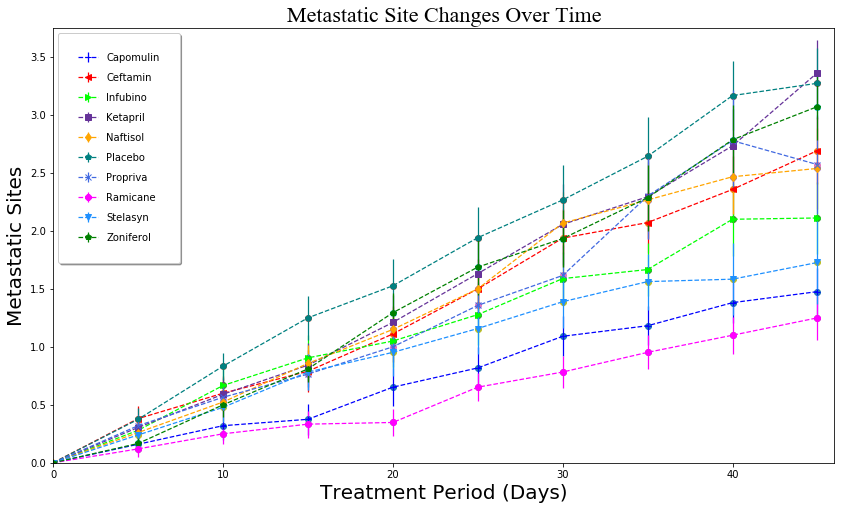

In [27]:
# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# Setting up the plot

# x_Axis values
a = [0,5,10,15,20,25,30,35,40,45]

# y_Axis values
b2 = MeanMetaVolume_df_pivot2["Capomulin"]
d2 = MeanMetaVolume_df_pivot2["Ceftamin"]
e2 = MeanMetaVolume_df_pivot2["Infubinol"]
f2 = MeanMetaVolume_df_pivot2["Ketapril"]
g2 = MeanMetaVolume_df_pivot2["Naftisol"]
h2 = MeanMetaVolume_df_pivot2["Placebo"]
j2 = MeanMetaVolume_df_pivot2["Propriva"]
k2 = MeanMetaVolume_df_pivot2["Ramicane"]
l2 = MeanMetaVolume_df_pivot2["Stelasyn"]
m2 = MeanMetaVolume_df_pivot2["Zoniferol"]

# Scatter Plot
plt.scatter(a,b2)
plt.scatter(a,d2)
plt.scatter(a,e2)
plt.scatter(a,f2)
plt.scatter(a,g2)
plt.scatter(a,h2)
plt.scatter(a,j2)
plt.scatter(a,k2)
plt.scatter(a,l2)
plt.scatter(a,m2)

# Standard Error Data
CapomulinMetaErr = MetaSiteErr_sem_pivot_df["Capomulin"]
CeftaminMetaErr = MetaSiteErr_sem_pivot_df["Ceftamin"]
InfubinolMetaErr = MetaSiteErr_sem_pivot_df["Infubinol"]
KetaprilMetaErr = MetaSiteErr_sem_pivot_df["Ketapril"]
NaftisolMetaErr = MetaSiteErr_sem_pivot_df["Naftisol"]
PlaceboMetaErr = MetaSiteErr_sem_pivot_df["Placebo"]
ProprivaMetaErr = MetaSiteErr_sem_pivot_df["Propriva"]
RamicaneMetaErr = MetaSiteErr_sem_pivot_df["Ramicane"]
StelasynMetaErr = MetaSiteErr_sem_pivot_df["Stelasyn"]
ZoniferolMetaErr = MetaSiteErr_sem_pivot_df["Zoniferol"]


CapomulinMetaPlot = plt.errorbar(a,b2,yerr=CapomulinMetaErr, linestyle="dashed", 
                              marker="+",color="blue", linewidth=1.25, label="Capomulin")

CeftaminMetaPlot = plt.errorbar(a,d2,yerr=CeftaminMetaErr, linestyle="dashed", 
                              marker="<",color="red", linewidth=1.25, label="Ceftamin")

InfubinoMetaPlot = plt.errorbar(a,e2,yerr=InfubinolMetaErr, linestyle="dashed", 
                              marker=">",color="lime", linewidth=1.25, label="Infubino")

KetaprilMetaPlot = plt.errorbar(a,f2,yerr=KetaprilMetaErr, linestyle="dashed", 
                              marker="s",color="rebeccapurple", linewidth=1.25, label="Ketapril")

NaftisolMetaPlot = plt.errorbar(a,g2,yerr=NaftisolMetaErr, linestyle="dashed", 
                              marker="d",color="orange", linewidth=1.25, label="Naftisol")

PlaceboMetaPlot = plt.errorbar(a,h2,yerr=PlaceboMetaErr, linestyle="dashed", 
                              marker="p",color="teal", linewidth=1.25, label="Placebo")

ProprivaMetaPlot = plt.errorbar(a,j2,yerr=ProprivaMetaErr, linestyle="dashed", 
                              marker="x",color="royalblue", linewidth=1.25, label="Propriva")

RamicaneMetaPlot = plt.errorbar(a,k2,yerr=RamicaneMetaErr, linestyle="dashed", 
                              marker="8",color="magenta", linewidth=1.25, label="Ramicane")

StelasynMetaPlot = plt.errorbar(a,l2,yerr=StelasynMetaErr, linestyle="dashed", 
                              marker="v",color="dodgerblue", linewidth=1.25, label="Stelasyn")

ZoniferolMetaPlot = plt.errorbar(a,m2,yerr=ZoniferolMetaErr, linestyle="dashed", 
                              marker="p",color="green", linewidth=1.25, label="Zoniferol")

matplotlib.rc('figure', figsize=(14, 8))
# plt.grid()
plt.ylim(0, 3.75)
plt.xlim(0, 46)
plt.title("Metastatic Site Changes Over Time",fontname="Times New Roman", fontsize=22, fontweight="bold")
plt.xlabel("Treatment Period (Days)", fontsize=20)
plt.ylabel("Metastatic Sites", fontsize=20)
plt.legend(loc="upper left",labelspacing=1, fontsize=10, fancybox=True, framealpha=1, shadow=True, borderpad=2)

# Save the Figure for "Tumor Change Over 45 Day Treatment"
plt.savefig("../Images/MetastaticSiteChanges.png")


## Survival Rates

In [28]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
# merged_data = pd.merge(mouse_data, clinical_data,how="left",on = ["Mouse ID"])


# merged_data.head(15)
''' Perform Groupby Drug, Timepoint and get Mice count '''
mice_srv_rate = merged_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
mice_srv_rate_df = pd.DataFrame(mice_srv_rate)

# mice_srv_rate_df["Mouse Count"] = ["Mouse ID"].count()

''' Reset Index '''
print(type(mice_srv_rate_df))
mice_srv_rate_df2 = mice_srv_rate_df.reset_index()

'''Preview Display to confirm format'''
print(type(mice_srv_rate_df2))
mice_srv_rate_df2

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [29]:
# Minor Data Munging to Re-Format the Data Frames

mice_srv_rate_df2 = mice_srv_rate_df2.pivot(index = "Timepoint", columns = "Drug")["Mouse ID"]
mice_srv_pivot_df = pd.DataFrame(mice_srv_rate_df2)

# Preview that Reformatting worked
print(type(mice_srv_pivot_df))

mice_srv_pivot_df


<class 'pandas.core.frame.DataFrame'>


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


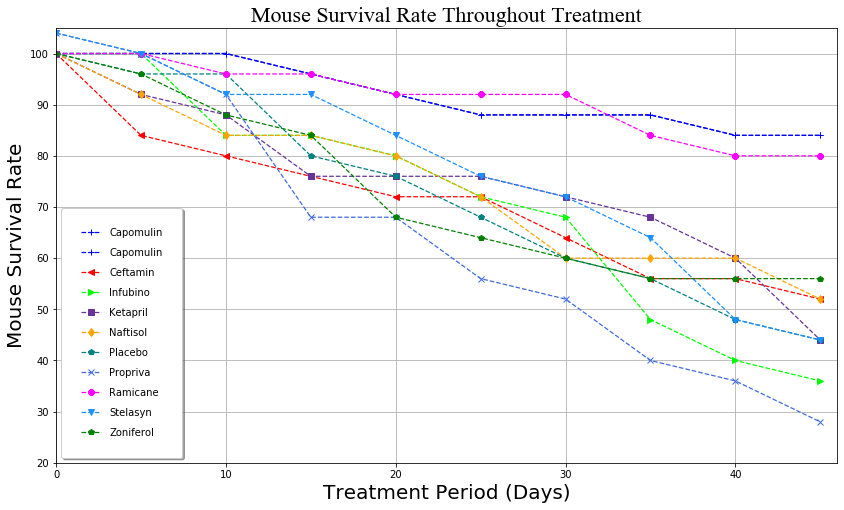

In [30]:
'''Creating a scatter plot that shows the MICE SURVIVAL RATE THROUGHOUT THE treatment
'''
# Setting up the plot

# x_Axis values
a = [0,5,10,15,20,25,30,35,40,45]

# y_Axis values
b3 = mice_srv_pivot_df["Capomulin"]/25*100
d3 = mice_srv_pivot_df["Ceftamin"]/25*100
e3 = mice_srv_pivot_df["Infubinol"]/25*100
f3 = mice_srv_pivot_df["Ketapril"]/25*100
g3 = mice_srv_pivot_df["Naftisol"]/25*100
h3 = mice_srv_pivot_df["Placebo"]/25*100
j3 = mice_srv_pivot_df["Propriva"]/25*100
k3 = mice_srv_pivot_df["Ramicane"]/25*100
l3 = mice_srv_pivot_df["Stelasyn"]/25*100
m3 = mice_srv_pivot_df["Zoniferol"]/25*100


CapomulinSrvPlot = plt.errorbar(a,b3, linestyle="dashed", 
                              marker="+",color="blue", linewidth=1.25, label="Capomulin")
                                
CapomulinSrvPlot = plt.errorbar(a,b3, linestyle="dashed", 
                              marker="+",color="blue", linewidth=1.25, label="Capomulin")

CeftaminSrvPlot = plt.errorbar(a,d3, linestyle="dashed", 
                              marker="<",color="red", linewidth=1.25, label="Ceftamin")

InfubinoSrvPlot = plt.errorbar(a,e3, linestyle="dashed", 
                              marker=">",color="lime", linewidth=1.25, label="Infubino")

KetaprilSrvPlot = plt.errorbar(a,f3, linestyle="dashed", 
                              marker="s",color="rebeccapurple", linewidth=1.25, label="Ketapril")

NaftisolSrvPlot = plt.errorbar(a,g3, linestyle="dashed", 
                              marker="d",color="orange", linewidth=1.25, label="Naftisol")

PlaceboSrvPlot = plt.errorbar(a,h3, linestyle="dashed", 
                              marker="p",color="teal", linewidth=1.25, label="Placebo")

ProprivaSrvPlot = plt.errorbar(a,j3, linestyle="dashed", 
                              marker="x",color="royalblue", linewidth=1.25, label="Propriva")

RamicaneSrvPlot = plt.errorbar(a,k3, linestyle="dashed", 
                              marker="8",color="magenta", linewidth=1.25, label="Ramicane")

StelasynSrvPlot = plt.errorbar(a,l3, linestyle="dashed", 
                              marker="v",color="dodgerblue", linewidth=1.25, label="Stelasyn")

ZoniferolSrvPlot = plt.errorbar(a,m3, linestyle="dashed", 
                              marker="p",color="green", linewidth=1.25, label="Zoniferol")

matplotlib.rc('figure', figsize=(14, 8))
plt.grid()
plt.ylim(20, 105)
plt.xlim(0, 46)
plt.title("Mouse Survival Rate Throughout Treatment",fontname="Times New Roman", fontsize=22, fontweight="bold")
plt.xlabel("Treatment Period (Days)", fontsize=20)
plt.ylabel("Mouse Survival Rate", fontsize=20)
plt.legend(loc="lower left",labelspacing=1, fontsize=10, fancybox=True, framealpha=1, shadow=True, borderpad=2)

# Save the Figure for "Tumor Change Over 45 Day Treatment"
plt.savefig("../Images/MiceSurvivalRate.png")

## Summary Bar Graph

In [31]:
tumor_vols_mean_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


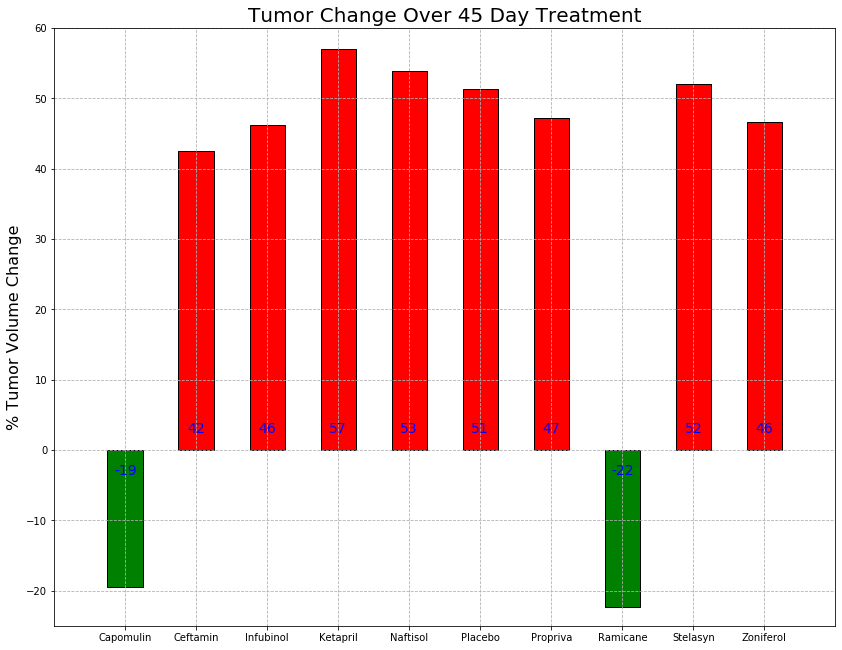

In [32]:
''' Percent Change in Tumor Volumen Over Entire Length of Testing for each Drug '''

PercentChgCapomulin_df = 100 *( (tumor_vols_mean_pivot_df["Capomulin"][45] - tumor_vols_mean_pivot_df["Capomulin"][0])/ 45 )
PercentChgCeftamin_df = 100 *( (tumor_vols_mean_pivot_df["Ceftamin"][45] - tumor_vols_mean_pivot_df["Ceftamin"][0])/ 45 )
PercentChgInfubinol_df = 100 *( (tumor_vols_mean_pivot_df["Infubinol"][45] - tumor_vols_mean_pivot_df["Infubinol"][0])/ 45 )
PercentChgKetapril_df = 100 *( (tumor_vols_mean_pivot_df["Ketapril"][45] - tumor_vols_mean_pivot_df["Ketapril"][0])/ 45 )
PercentChgNaftisol_df = 100 *( (tumor_vols_mean_pivot_df["Naftisol"][45] - tumor_vols_mean_pivot_df["Naftisol"][0])/ 45 )
PercentChgPlacebo_df = 100 *( (tumor_vols_mean_pivot_df["Placebo"][45] - tumor_vols_mean_pivot_df["Placebo"][0])/ 45 )
PercentChgPropriva_df = 100 *( (tumor_vols_mean_pivot_df["Propriva"][45] - tumor_vols_mean_pivot_df["Propriva"][0])/ 45 )
PercentChgRamicane_df = 100 *( (tumor_vols_mean_pivot_df["Ramicane"][45] - tumor_vols_mean_pivot_df["Ramicane"][0])/ 45 )
PercentChgStelasyn_df = 100 *( (tumor_vols_mean_pivot_df["Stelasyn"][45] - tumor_vols_mean_pivot_df["Stelasyn"][0])/ 45 )
PercentChgZoniferol_df = 100 *( (tumor_vols_mean_pivot_df["Zoniferol"][45] - tumor_vols_mean_pivot_df["Zoniferol"][0])/ 45 )

plt.figure(figsize=(14,11))
tick_locations = [value+0.5 for value in a]
plt.grid(linestyle="dashed")

positions = (1,2,3,4,5,6,7,8,9,10)
labels = ("Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol")
plt.xticks(positions, labels)

plt.xlim(0, 11)
plt.ylim(-25, 60)

plt.title("Tumor Change Over 45 Day Treatment", fontsize=20)
plt.ylabel("% Tumor Volume Change", fontsize=16)

rects1 = plt.bar(1, PercentChgCapomulin_df, color='g', alpha=1, align="center", ec="black", width=.5, label="Capomulin")
rects2 = plt.bar(2, PercentChgCeftamin_df, color='r', alpha=1, align="center", ec="black", width=.5)
rects3 = plt.bar(3, PercentChgInfubinol_df, color='r', alpha=1, align="center", ec="black", width=.5)
rects4 = plt.bar(4, PercentChgKetapril_df, color='r', alpha=1, align="center", ec="black", width=.5)
rects5 = plt.bar(5, PercentChgNaftisol_df, color='r', alpha=1, align="center", ec="black", width=.5)
rects6 = plt.bar(6, PercentChgPlacebo_df, color='r', alpha=1, align="center", ec="black", width=.5)
rects7 = plt.bar(7, PercentChgPropriva_df, color='r', alpha=1, align="center", ec="black", width=.5)
rects8 = plt.bar(8, PercentChgRamicane_df, color='g', alpha=1, align="center", ec="black", width=.5)
rects9 = plt.bar(9, PercentChgStelasyn_df, color='r', alpha=1, align="center", ec="black", width=.5)
rects10 = plt.bar(10, PercentChgZoniferol_df, color='r', alpha=1, align="center", ec="black", width=.5)


''' Define Function below to add TEXT Labels to each Bar '''

def autolabel_1(rects):
    """
    Attach a text label on each GREEN bar indicating the height of the bar
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -4,
                '%d' % int(height), ha='center', va='bottom', fontsize=14, color="blue")

autolabel_1(rects1)
autolabel_1(rects8)


def autolabel(rects):
    """
    Attach a text label on each RED bar indicating the height of the bar
    """
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height), ha='center', va='bottom', fontsize=14, color="blue")

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects9)
autolabel(rects10)

# Save the Figure for "Tumor Change Over 45 Day Treatment"
plt.savefig("../Images/BarTumorPercentChange.png")
